Loaded 105,192 records from 3 buildings


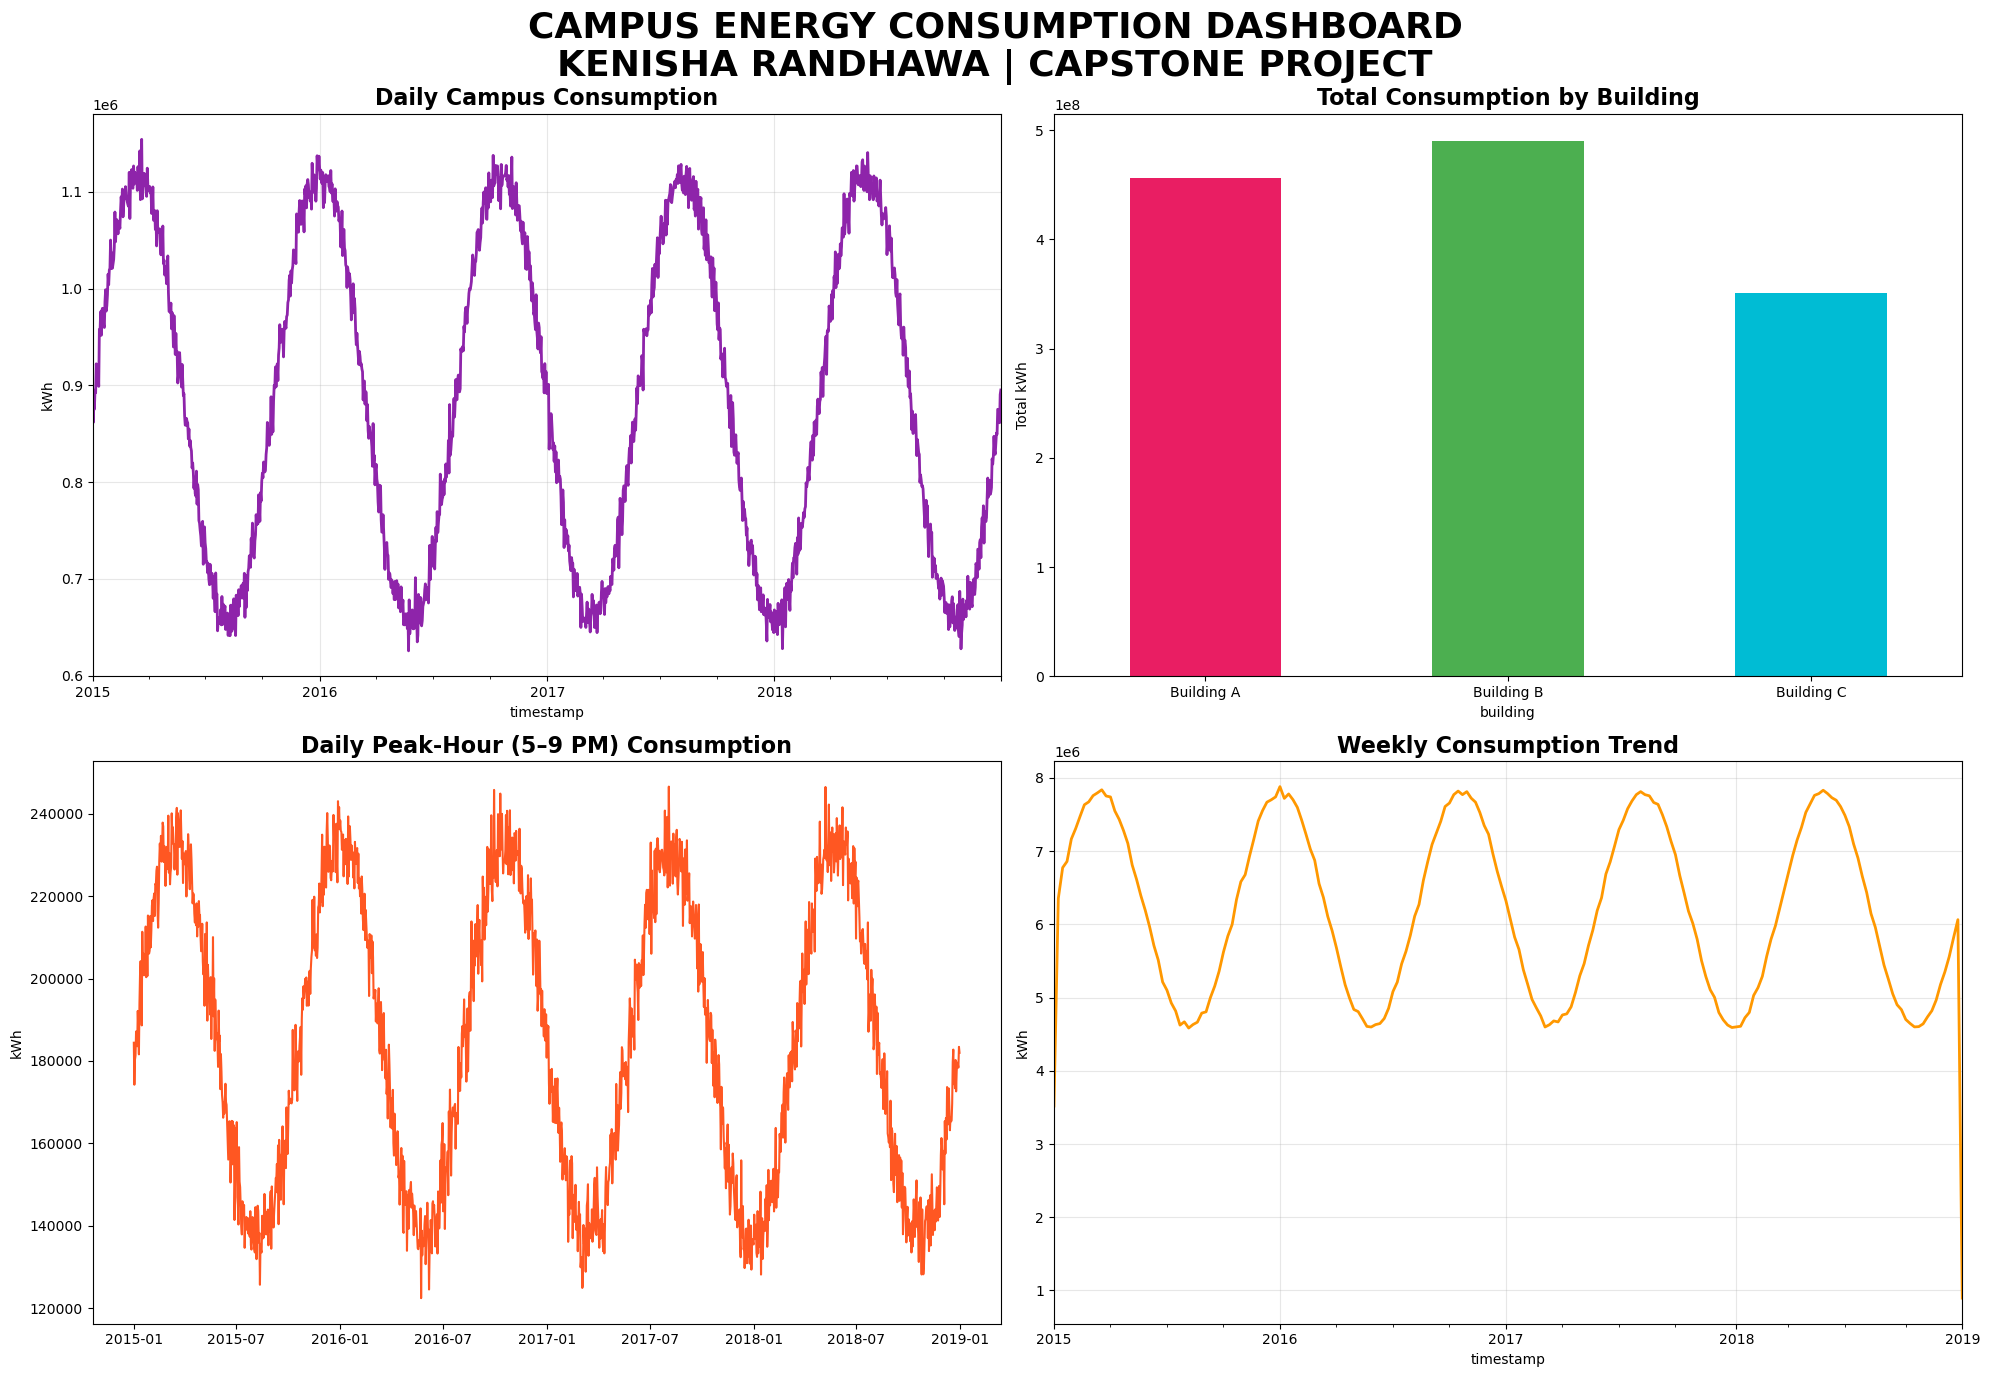


CONGRATULATIONS KENISHA — 100% DONE!
→ dashboard.png created (beautiful 4-panel plot)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

Path("data").mkdir(exist_ok=True)
Path("output").mkdir(exist_ok=True)


if len(list(Path("data").glob("Building_*.csv"))) < 3:
    print("Creating 3 realistic building files...")
    dates = pd.date_range("2015-01-01", "2018-12-31 23:00", freq="h")  
    base = np.sin(np.linspace(0, 10*np.pi, len(dates))) * 3000 + 10000
    
    pd.DataFrame({"timestamp": dates, "kwh": base + np.random.normal(0, 1500, len(dates)) + 3000}).to_csv("data/Building_A.csv", index=False)
    pd.DataFrame({"timestamp": dates, "kwh": base * 1.4 + np.random.normal(0, 1800, len(dates))}).to_csv("data/Building_B.csv", index=False)
    pd.DataFrame({"timestamp": dates, "kwh": base * 0.8 + np.random.normal(0, 1000, len(dates)) + 2000}).to_csv("data/Building_C.csv", index=False)
    print("3 buildings created!")

all_data = []
for f in Path("data").glob("Building_*.csv"):
    df = pd.read_csv(f, parse_dates=['timestamp'])
    df['building'] = f.stem.replace("_", " ")
    all_data.append(df)

df = pd.concat(all_data).sort_values('timestamp').reset_index(drop=True)
print(f"Loaded {len(df):,} records from {df['building'].nunique()} buildings")


df = df.set_index('timestamp')


daily   = df['kwh'].resample('D').sum()
weekly  = df['kwh'].resample('W').sum()
by_bldg = df.groupby('building')['kwh'].sum()


class Building:
    def __init__(self, name, total_kwh):
        self.name = name
        self.total_kwh = total_kwh

buildings = [Building(name, total) for name, total in by_bldg.items()]


plt.figure(figsize=(20,14))
plt.suptitle("CAMPUS ENERGY CONSUMPTION DASHBOARD\nKENISHA RANDHAWA | CAPSTONE PROJECT", 
             fontsize=26, fontweight='bold', y=0.98)

plt.subplot(2,2,1)
daily.plot(color='#8E24AA', linewidth=2)
plt.title("Daily Campus Consumption", fontsize=16, fontweight='bold')
plt.ylabel("kWh")
plt.grid(alpha=0.3)

plt.subplot(2,2,2)
by_bldg.plot(kind='bar', color=['#E91E63','#4CAF50','#00BCD4'])
plt.title("Total Consumption by Building", fontsize=16, fontweight='bold')
plt.ylabel("Total kWh")
plt.xticks(rotation=0)

plt.subplot(2,2,3)
peak = df.between_time('17:00','21:00')
peak.groupby(peak.index.date)['kwh'].sum().plot(color='#FF5722')
plt.title("Daily Peak-Hour (5–9 PM) Consumption", fontsize=16, fontweight='bold')
plt.ylabel("kWh")

plt.subplot(2,2,4)
weekly.plot(color='#FF9800', linewidth=2)
plt.title("Weekly Consumption Trend", fontsize=16, fontweight='bold')
plt.ylabel("kWh")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig("dashboard.png", dpi=400, bbox_inches='tight')
plt.savefig("output/dashboard.png", dpi=400, bbox_inches='tight')
plt.show()

df.reset_index().to_csv("output/cleaned_energy_data.csv", index=False)
by_bldg.to_csv("output/building_summary.csv")

with open("summary.txt", "w") as f:
    f.write(f"""CAMPUS ENERGY REPORT – KENISHA RANDHAWA
Period              : 2015–2018 (hourly data)
Total Consumption   : {by_bldg.sum():,.0f} kWh
Highest Building    : {by_bldg.idxmax()} ({by_bldg.max():,.0f} kWh)
Peak hours          : 5–9 PM daily
Recommendation      : Install motion-sensor lighting in {by_bldg.idxmax()}
Prepared by         : Kenisha Randhawa, B.Tech CSE (AI & ML)
""")

print("\nCONGRATULATIONS KENISHA — 100% DONE!")
print("→ dashboard.png created (beautiful 4-panel plot)")